Ćwiczenie 1:

- zapoznaj się z grą FlapPy Bird

- wykorzystując sklearn.linear_model.LinearRegression wykonaj regresje na kolejnych zapisanych pozycjach postaci, wykorzystując wielomian jak najniższego rzędu

- na podstawie wyniku wykonanej regresji wygeneruj ścieżkę pozwalającą na osiągnięcie co najmniej 15 punktów

- napisz własną implementację regresji liniowej

- wykorzystując własną implementację regresji liniowej wykonaj regresje na kolejnych zapisanych pozycjach postaci, wykorzystując wielomian jak najniższego rzędu

- na podstawie wyniku wykonanej regresji wygeneruj ścieżkę pozwalającą na osiągnięcie co najmniej 15 punktów

Wczytanie danych z pliku csv

In [73]:
import csv
import numpy as np
X = []
y = []
# wczytanie danych z pliku
with open('./last_autosave.csv', mode='r') as plik_csv :
    csv_Rdr = csv.reader(plik_csv, delimiter=',')
    for wiersz in csv_Rdr:
        X.append(wiersz[0])
        y.append(wiersz[1])

X = np.array(X).astype(np.int)
y = np.array(y).astype(np.float)

Uzycie wielomianu 19-stego stopnia - dla niego jest najlepsze dopasowanie

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score

model = make_pipeline(PolynomialFeatures(degree=19), LinearRegression(normalize=True))
model.fit(X.reshape(-1, 1), y)
predicted_y = model.predict(X.reshape(-1, 1))

print("Accuracy wynosi:", r2_score(y, predicted_y))

Accuracy wynosi: 0.9503207640066638


Nakreślenie ścieżki-predykcji jaką powieniem poruszać się FlappyBird

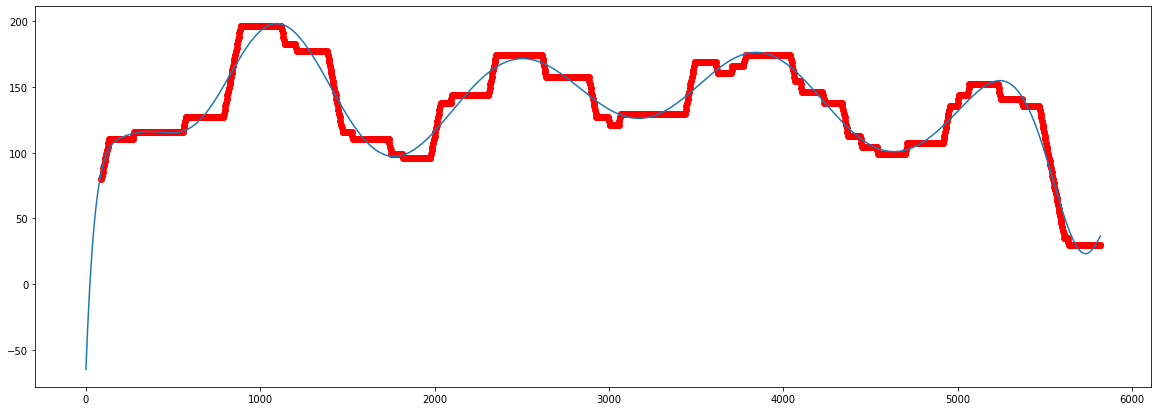

In [75]:
import matplotlib.pyplot as plt

steps = np.arange(int(X[-1]))
predicted_path = model.predict(steps.reshape(-1, 1))
plt.figure(figsize=(20, 7))
plt.scatter(X, y, c="red")
plt.plot(steps, predicted_path)
plt.show()

Zapisanie danych

In [76]:
test = np.concatenate((steps.reshape(-1, 1), predicted_path.reshape(-1, 1)), axis=1)
np.savetxt("predicted_sklearn.csv", test, delimiter=",")

Implementacja własnej regresji liniowej

In [38]:
def lineral_regression(X, y, n):
    poli = PolynomialFeatures(n)
    Xprim = poli.fit_transform(X.reshape(-1, 1))
    coeff = np.dot((np.linalg.inv(np.dot(Xprim.T,Xprim))),np.dot(Xprim.T,y))
    return coeff

Uzycie regresji liniowej dla wiolomianu 9-tego stopnia - gwarantuje to najlepsze dopasowanie

In [77]:
n = 9
wspolczynniki = lineral_regression(X, y, n)
wspolczynniki

array([ 1.84941355e+02, -8.86631662e-01,  2.96233069e-03, -4.02413035e-06,
        2.86860742e-09, -1.19502195e-12,  3.02856933e-16, -4.61643197e-20,
        3.90319974e-24, -1.40976170e-28])

In [81]:
steps = np.arange(int(X[-1]))
poli = PolynomialFeatures(n)
steps_poli = poli.fit_transform(steps.reshape(-1, 1))
wspolczynniki = lineral_regression(X, y, n)
mnozenie = np.sum(np.multiply(steps_poli, wspolczynniki), axis=1)
xprim = poli.fit_transform(X.reshape(-1, 1))
mnozenie_do_accuracy = np.sum(np.multiply(xprim, wspolczynniki), axis=1)
print("Accuracy wynosi:", r2_score(y, mnozenie_do_accuracy))

Accuracy wynosi: 0.5839113299864229


Nakreślenie ścieżki-predykcji jaką powieniem poruszać się FlappyBird

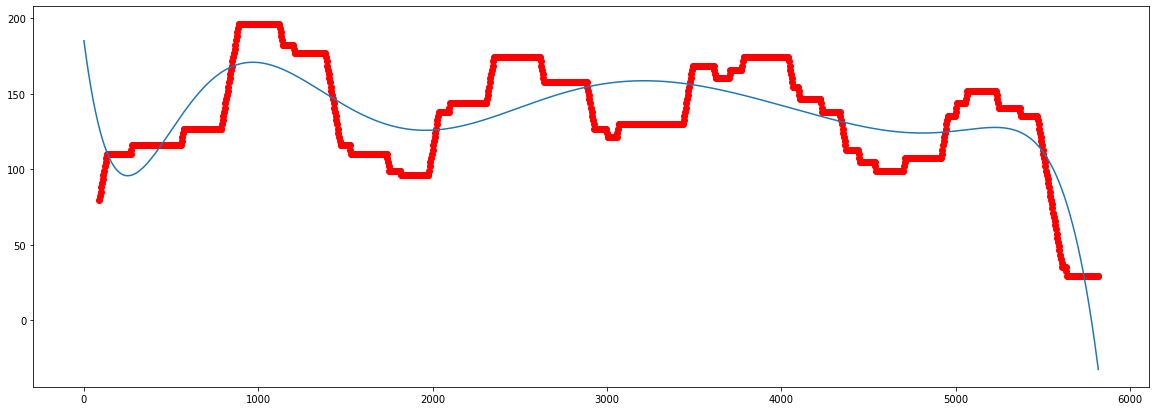

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.scatter(X, y, c="red")
plt.plot(steps, mnozenie)
plt.show()

In [42]:
test = np.concatenate((steps.reshape(-1, 1), mnozenie.reshape(-1, 1)), axis=1)
np.savetxt("predicted_own.csv", test, delimiter=",")

Widać (na podstawie wykresów), że liniowa regresja dostarczona przez moduł sklearn jest znacznie lepsza i dokładniejsza. Moja własna regresja liniowa przy wielomianach wysokiego rzędu posiada gorsze wyniki.

Ćwiczenie 2:

- pobierz i zapoznaj się ze zbiorem Portugal 2019 Data Set (https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019)

- wykorzystując dane w pliku ElectionData.csv i własną implementację wykonaj regresję na wynikach wyborów każdej z partii dla całego kraju (Territorio Nacional) w funkcji czasu

- napisz algorytm znajdujący najmniejszą liczbę punktów czasowych wymaganych do przewidzenia końcowego wyniku 3 największych partii (PS, PPD/PSD, B./E.) w całym kraju z tolerancją ± 30 mandatów; dobór algorytmu będzie miał wpływ na ocenę ćwiczenia

- porównaj skuteczność własnej implementacji i implementacji sklearn

In [43]:
import pandas as pd

df = pd.read_csv('ElectionData.csv')

Nac = df.loc[df['territoryName'] == 'Território Nacional']
dane = Nac[['TimeElapsed','Party','Mandates']]
partie =pd.unique(Nac['Party'])
dane

,TimeElapsed,Party,Mandates
0,0,PS,0
1,0,PPD/PSD,0
2,0,B.E.,0
3,0,CDS-PP,0
4,0,PCP-PEV,0
...,...,...,...
21256,265,PURP,0
21257,265,PDR,0
21258,265,PPM,0
21259,265,PTP,0


Wykresy liczby mandatów do czasu z regresją liniową z modułu sklearn 

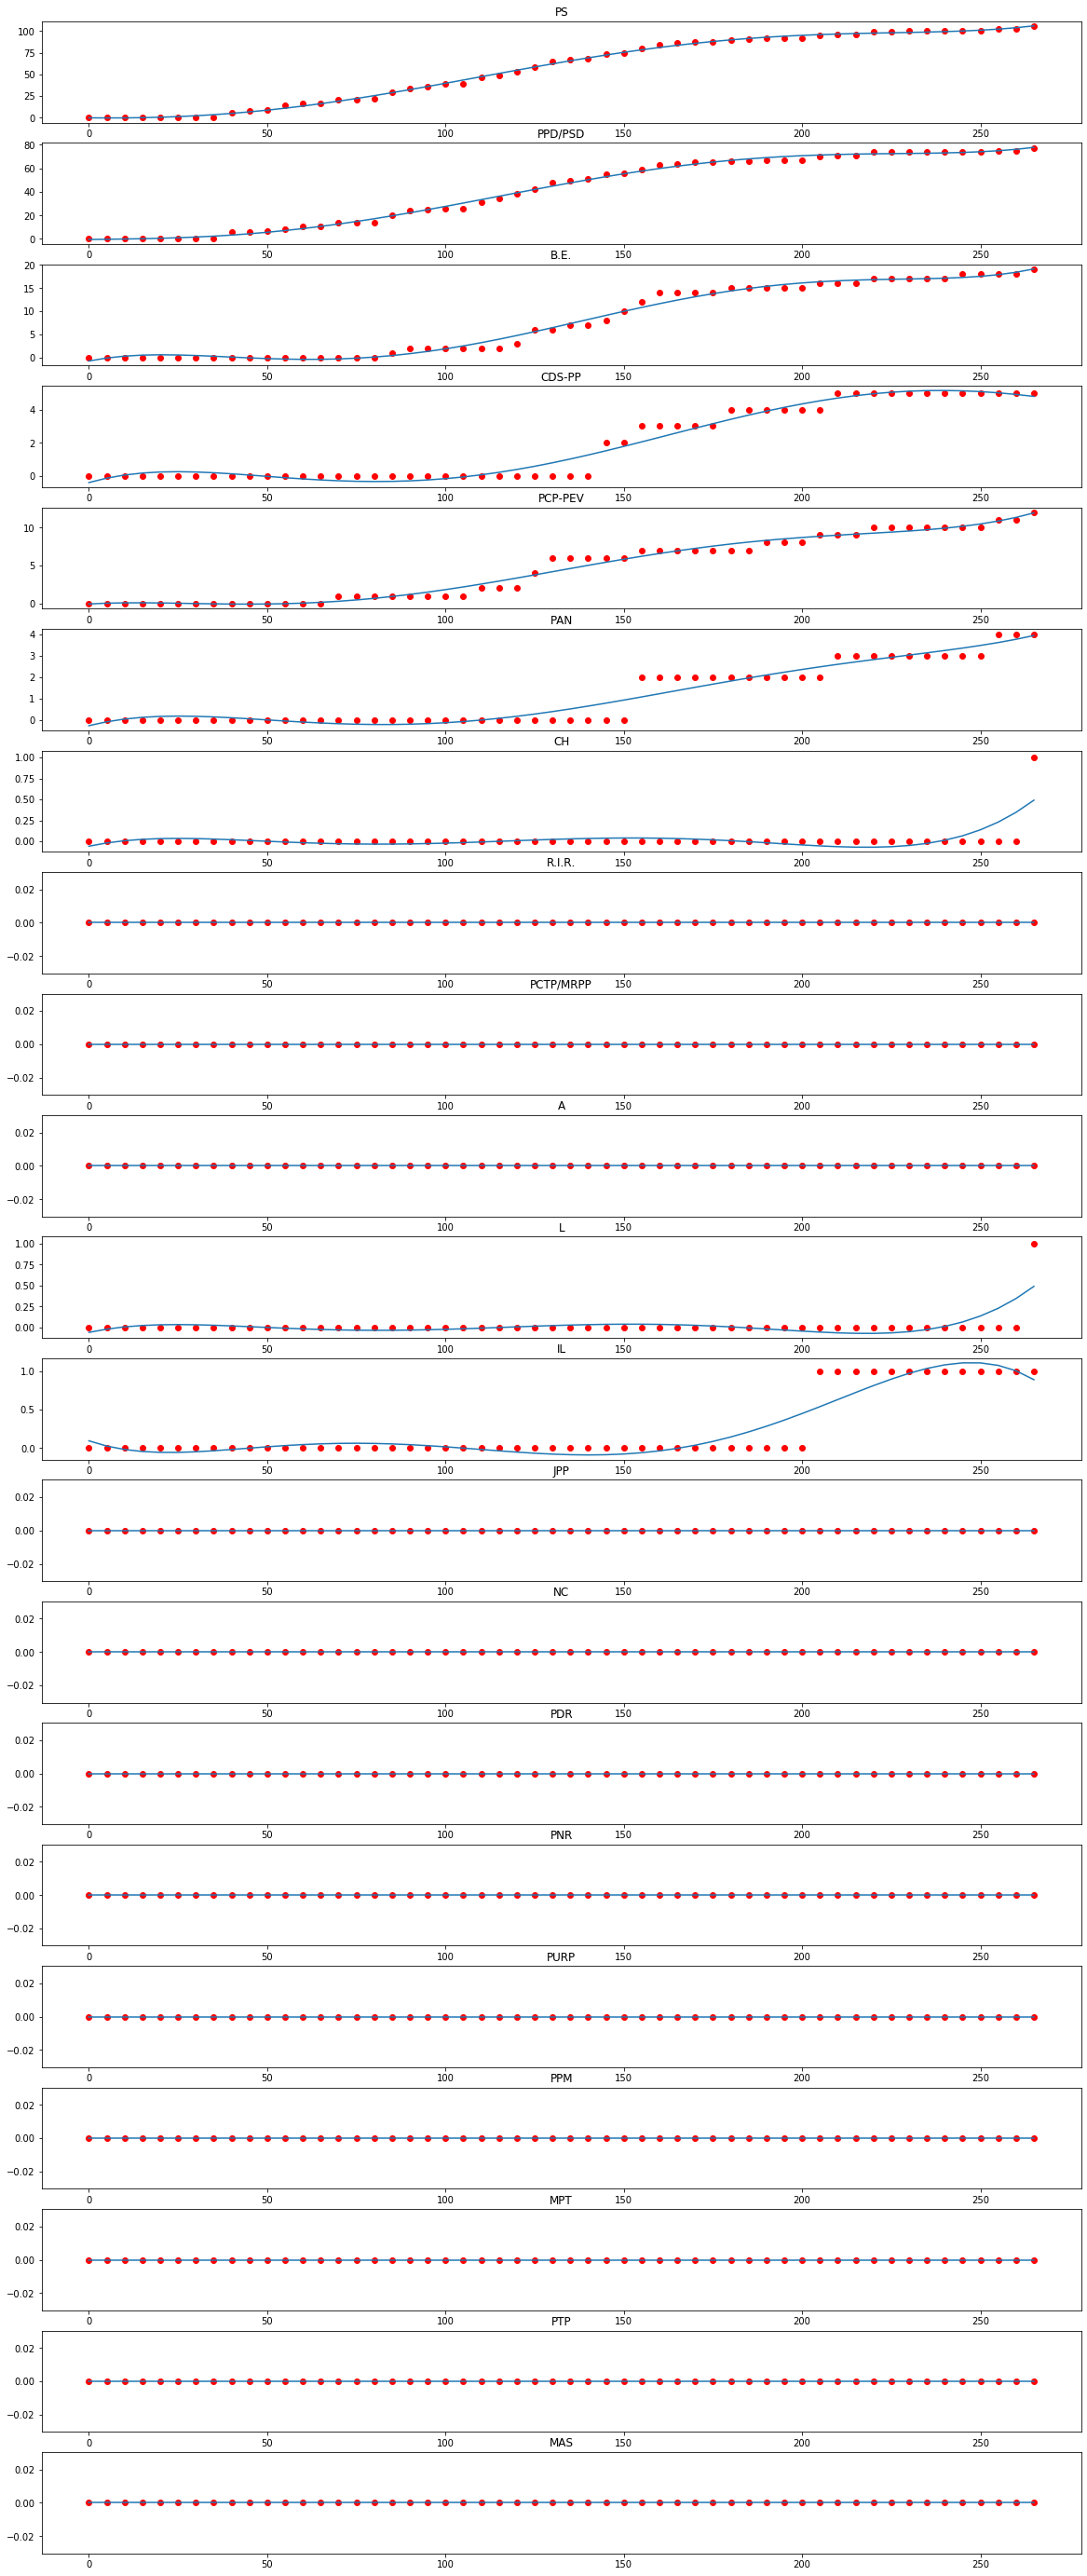

Średnie accuracy wynosi: 0.9390277055201517


In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
table = []
for party in partie:
    table.append(dane.query('Party=="' + party + '"'))

model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression(normalize=True))
fig = plt.figure(figsize=(20, 50))
i = 0
accuracy = []
for party in table:

    time = party.iloc[:, 0]
    X = time.as_matrix()
        
    mandates = party.iloc[:, 2]
    y = mandates.as_matrix()

    model.fit(X.reshape(-1, 1), y)

    predykcje = model.predict(X.reshape(-1, 1))
    ax = fig.add_subplot(21,1,i+1)
    plt.scatter(X, y, c="red")
    i = i + 1
    ax.set_title(partie[i-1])
    plt.plot(X, predykcje)
    accuracy.append(r2_score(y, predykcje))
plt.show()
print("Średnie accuracy wynosi:", sum(accuracy)/len(accuracy))

Wykresy liczby mandatów do czasu z regresją liniową używając własnej implementacji 

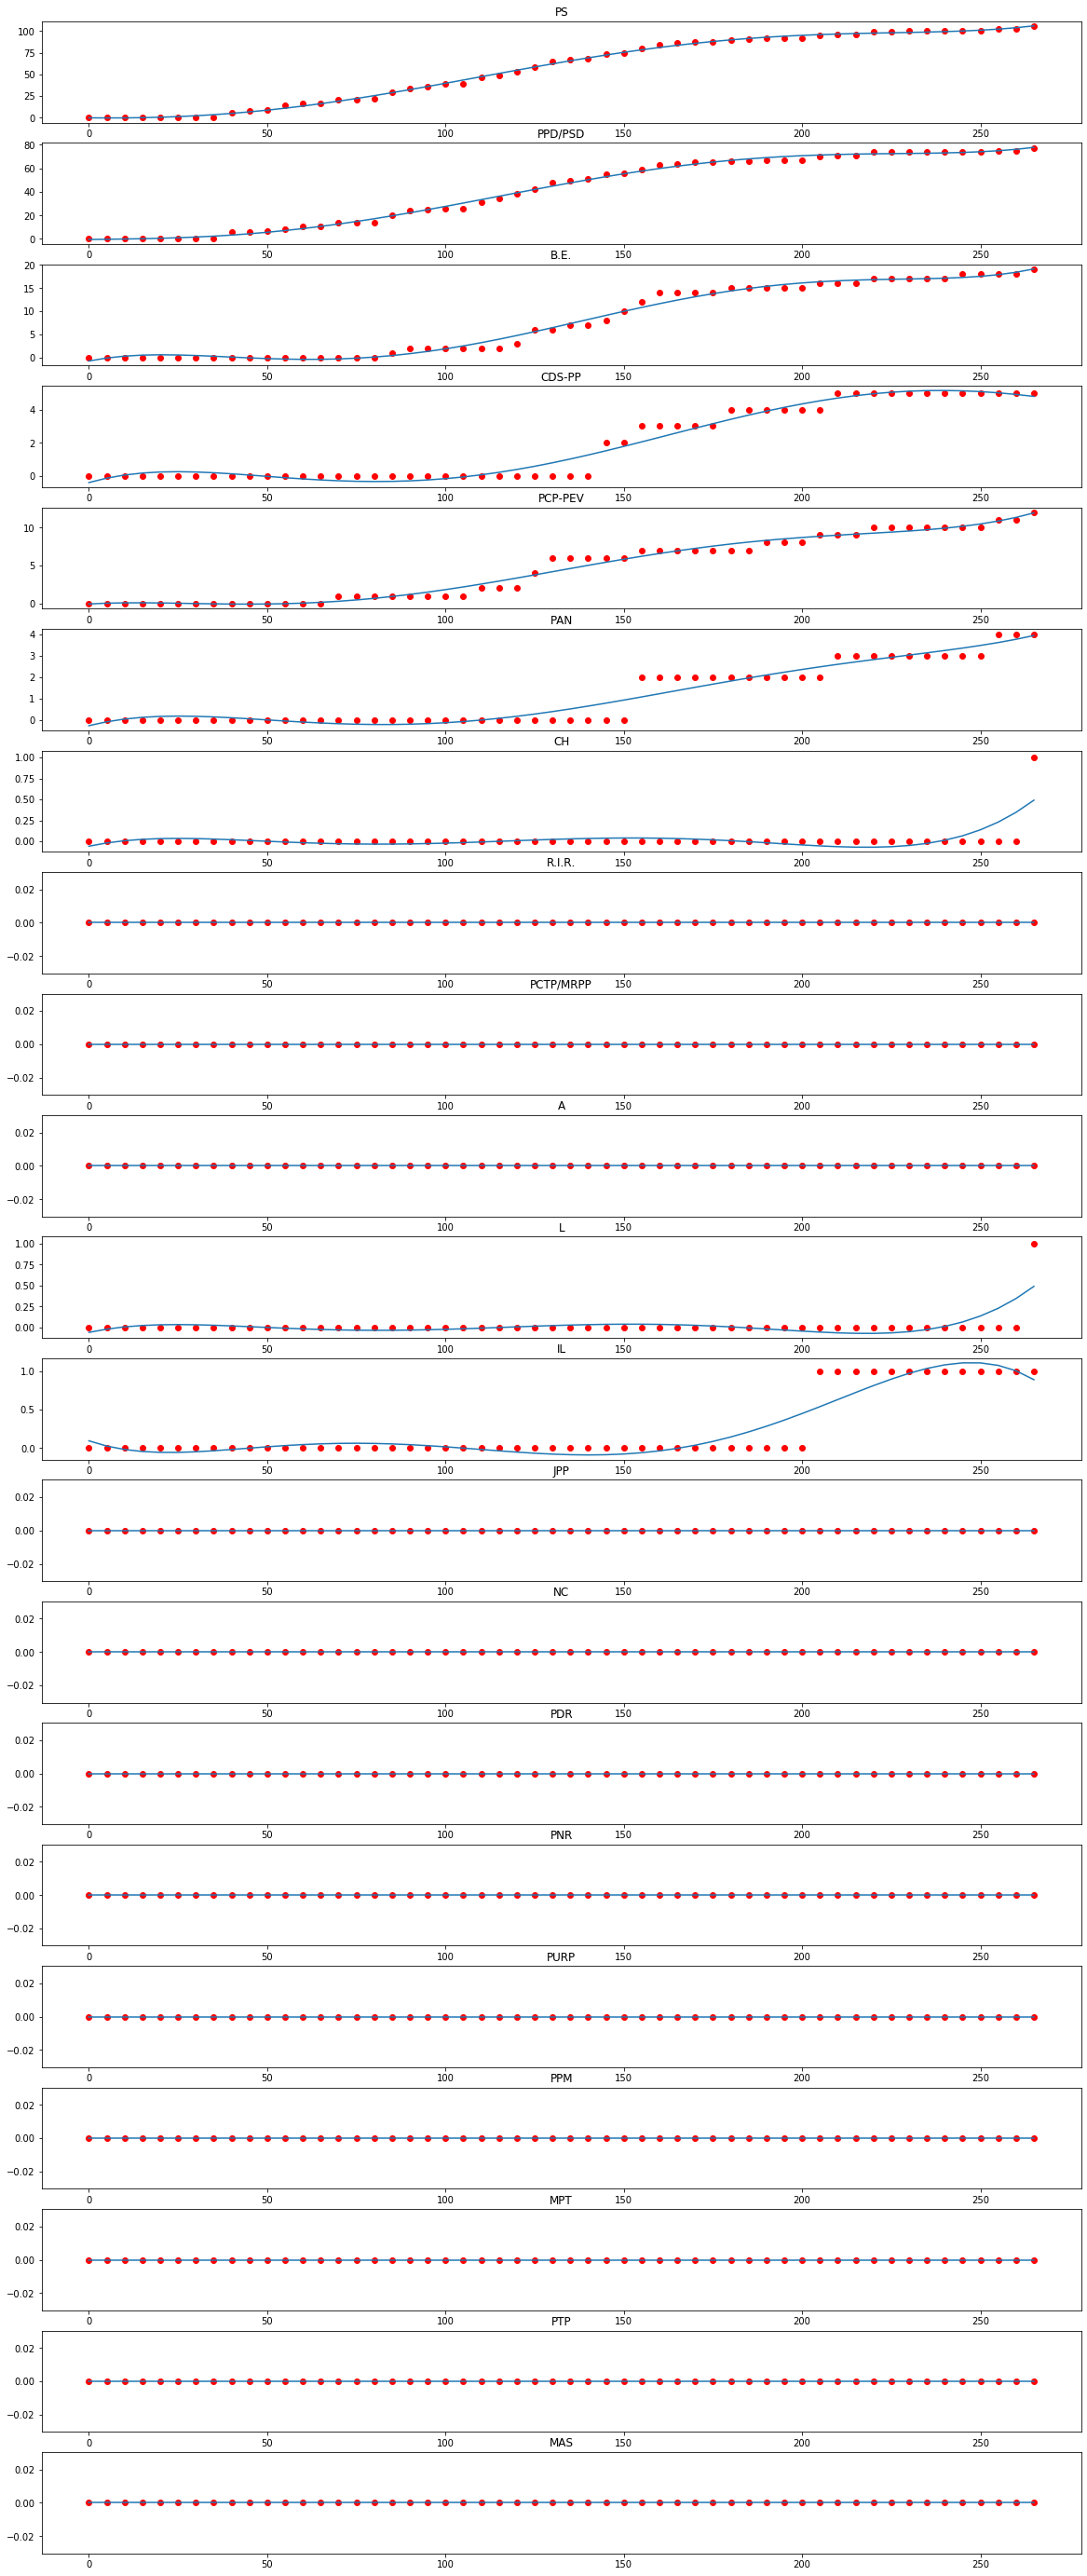

Średnie accuracy wynosi: 0.9390277055201504


In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

table = []
for party in partie:
    table.append(dane.query('Party=="' + party + '"'))

accuracy = []
fig = plt.figure(figsize=(20, 50))
i = 0
for party in table:

    time = party.iloc[:, 0]
    X = time.as_matrix()
        
    mandates = party.iloc[:, 2]
    y = mandates.as_matrix()

    poli = PolynomialFeatures(5)
    steps_poli = poli.fit_transform(X.reshape(-1, 1))
    wspolczynniki = lineral_regression(X, y, 5)
    mnozenie = np.sum(np.multiply(steps_poli, wspolczynniki), axis=1)
    ax = fig.add_subplot(21,1,i+1)
    plt.scatter(X, y, c="red")
    i = i + 1
    ax.set_title(partie[i-1])
    plt.plot(X, mnozenie)
    accuracy.append(r2_score(y, mnozenie))
plt.show()
print("Średnie accuracy wynosi:", sum(accuracy)/len(accuracy))

In [57]:
def binarySearch (arr, l, r, x): 
    if r >= l: 
        mid = l + (r - l)//2
        if arr[mid] <= x: 
            return mid 
        elif arr[mid] > x: 
            return binarySearch(arr, l, mid-1, x) 
        else: 
            return binarySearch(arr, mid+1, r, x) 
    else: 
        return -1

In [59]:
from sklearn.metrics import r2_score

result = []
for party in ['PS','PPD/PSD','B.E.']:
    for n in range(5):
        table = dane.query('Party=="'+party+'"')

        time = table.iloc[:, 0]
        X = time.as_matrix()
            
        mandates = table.iloc[:, 2]
        y = mandates.as_matrix()

        model = make_pipeline(PolynomialFeatures(degree=n), LinearRegression(normalize=True))
        model.fit(X.reshape(-1, 1), y)

        predykcje = model.predict(X.reshape(-1, 1))
        result.append(r2_score(y, predykcje))

    xd = binarySearch(result, 0, len(result)-1, 30)
    print("Dla partii " + party + " najmniejsza liczba punktów czasowych, żeby otrzymac dobrą predykcję wynosi: ", xd)
    

Dla partii PS najmniejsza liczba punktów czasowych, żeby otrzymac dobrą predykcję wynosi:  2
Dla partii PPD/PSD najmniejsza liczba punktów czasowych, żeby otrzymac dobrą predykcję wynosi:  4
Dla partii B.E. najmniejsza liczba punktów czasowych, żeby otrzymac dobrą predykcję wynosi:  7


Dla tych samych wielkości rzędu wielomianu dokładność predykcji jest na podobnym poziomie. Biorąc pod uwagę złożoność czasową i obliczeniową, liniowa regresja dostarczona przez sklearn jest znacznie lepsza.